In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

### Part 1

### Loading and preparing data:

In [2]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
train_x = train_x.reshape((train_x.shape[0], 28, 28, 1)) / 255.0
test_x = test_x.reshape((test_x.shape[0], 28, 28, 1)) / 255.0

4422102/4422102 [==============================] - 0s 0us/step


### Construction of a convolutional neural network:

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 9s 6ms/step - loss: 0.5542 - accuracy: 0.7971 - val_loss: 0.3831 - val_accuracy: 0.8599
Epoch 2/30
750/750 [==============================] - 3s 4ms/step - loss: 0.3528 - accuracy: 0.8720 - val_loss: 0.3286 - val_accuracy: 0.8821
Epoch 3/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2993 - accuracy: 0.8911 - val_loss: 0.3024 - val_accuracy: 0.8904
Epoch 4/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2664 - accuracy: 0.9038 - val_loss: 0.2924 - val_accuracy: 0.8929
Epoch 5/30
750/750 [==============================] - 4s 5ms/step - loss: 0.2424 - accuracy: 0.9107 - val_loss: 0.2668 - val_accuracy: 0.9016
Epoch 6/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2215 - accuracy: 0.9188 - val_loss: 0.2609 - val_accuracy: 0.9053
Epoch 7/30
750/750 [==============================] - 3s 4ms/step - loss: 0.2012 - accuracy: 0.9262 - val_loss: 0.2662 - val_accuracy: 0.9026
Epoch 

In [4]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.9858333468437195 and test data 0.9086666703224182 of our model


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

### Let's plot accuracy and loss graphs on the training and test sets:

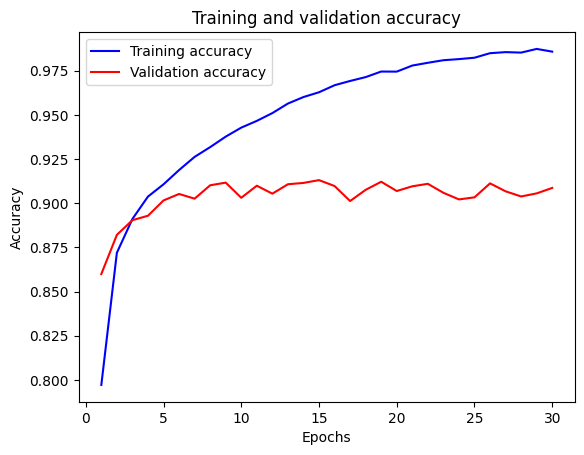

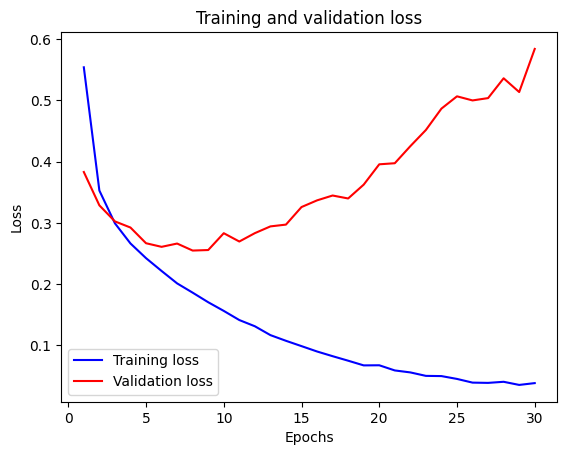

In [6]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Let's increase the number of epochs and decrease the number of batch sizes:

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5252 - accuracy: 0.8069 - val_loss: 0.3682 - val_accuracy: 0.8680
Epoch 2/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3411 - accuracy: 0.8754 - val_loss: 0.3191 - val_accuracy: 0.8827
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2896 - accuracy: 0.8945 - val_loss: 0.3105 - val_accuracy: 0.8879
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2598 - accuracy: 0.9040 - val_loss: 0.2864 - val_accuracy: 0.8962
Epoch 5/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2328 - accuracy: 0.9144 - val_loss: 0.2601 - val_accuracy: 0.9041
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2104 - accuracy: 0.9216 - val_loss: 0.2513 - val_accuracy: 0.9070
Epoch 7/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1917 - accuracy: 0.9277 - val_loss: 0.2531 - val_accuracy:

In [8]:
print(f"Achieved accuracy on training {history.history['accuracy'][-1]} and test data {history.history['val_accuracy'][-1]} of our model")

Achieved accuracy on training 0.984375 and test data 0.9055833220481873 of our model


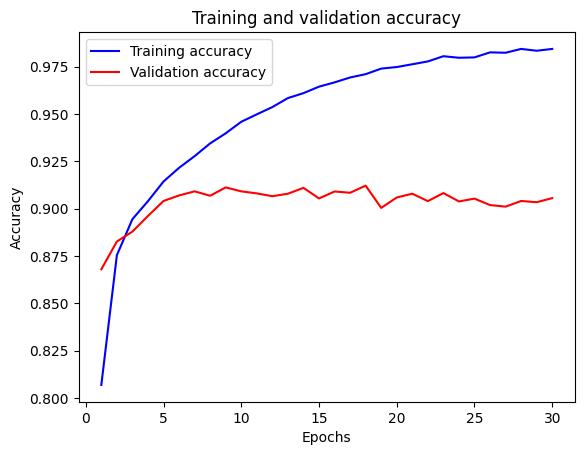

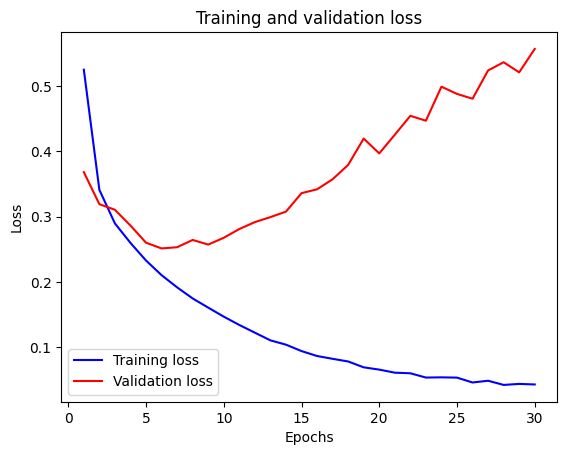

In [9]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It can be seen that the accuracy on the training data increases rapidly, much faster than that of the fully connected neural network. But on the test data, the results are much worse, the error increases significantly after the 10th epoch, which indicates the phenomenon of overtraining.

---

As a result of the research, we found that the accuracy of the convolutional neural network is higher compared to the fully connected one (from the previous homework), namely 98% versus 91.34%. It also became clear that training a convolutional neural network takes more time.

### Part 2

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

### Loading and preparing data:

In [11]:
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

train_x = np.expand_dims(train_x, axis=-1)
train_x = np.repeat(train_x, 3, axis=-1)
test_x = np.expand_dims(test_x, axis=-1)
test_x = np.repeat(test_x, 3, axis=-1)
train_x = tf.image.resize(train_x, [32, 32])
test_x = tf.image.resize(test_x, [32, 32])
train_x = train_x / 255.0
test_x = test_x / 255.0


train_y = to_categorical(train_y)
test_y = to_categorical(test_y)

In [14]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16_base.trainable = False


x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
1500/1500 [==============================] - 23s 14ms/step - loss: 0.5214 - accuracy: 0.8115 - val_loss: 0.4587 - val_accuracy: 0.8303
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4029 - accuracy: 0.8508 - val_loss: 0.4071 - val_accuracy: 0.8521
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3663 - accuracy: 0.8641 - val_loss: 0.3970 - val_accuracy: 0.8538
Epoch 4/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.3404 - accuracy: 0.8740 - val_loss: 0.3927 - val_accuracy: 0.8569
Epoch 5/10
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3229 - accuracy: 0.8785 - val_loss: 0.3876 - val_accuracy: 0.8597
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3052 - accuracy: 0.8846 - val_loss: 0.3646 - val_accuracy: 0.8676
Epoch 7/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.2910 - accuracy: 0.8907 - val_loss: 0.3554 -

It is important to say that training the convolutional base VGG16 takes much more time, in our case - 3 minutes.
As a result, we obtained accuracy on the training data 91%, and on the test data - 87%.

Having conducted parallel training with an increased batch size (512), we obtained slightly worse results in terms of accuracy (less by 1-2%) and did not achieve acceleration of the training process.
We conducted all these trainings at the CPU.

In [15]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

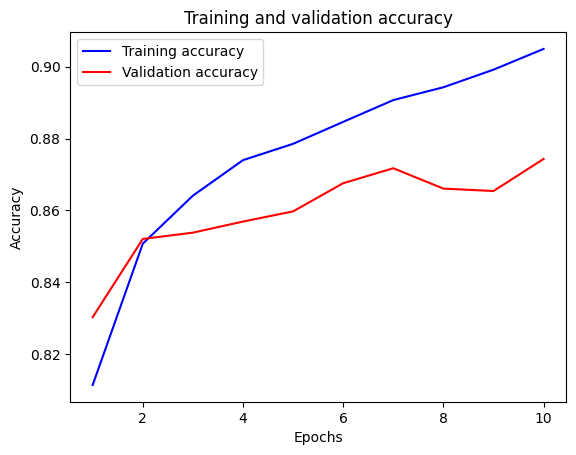

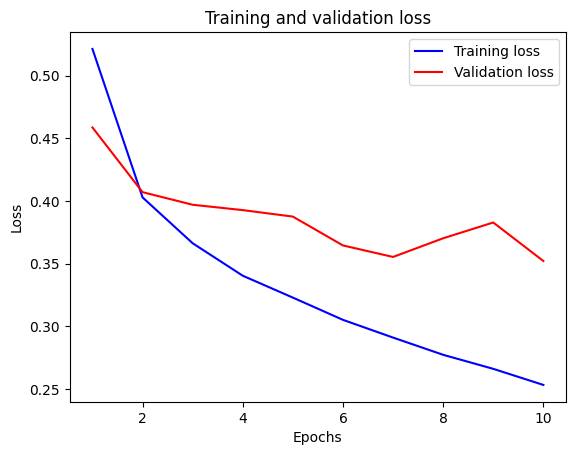

In [16]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Using the GPU, you don't need to wait for hour of training, the process of learning the model is much faster.

In [17]:
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16_base.trainable = False

x = Flatten()(vgg16_base.output)
x = Dense(512, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg16_base.input, outputs=output)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
375/375 [==============================] - 11s 24ms/step - loss: 0.5724 - accuracy: 0.8007 - val_loss: 0.4477 - val_accuracy: 0.8377
Epoch 2/10
375/375 [==============================] - 7s 20ms/step - loss: 0.4194 - accuracy: 0.8486 - val_loss: 0.4374 - val_accuracy: 0.8418
Epoch 3/10
375/375 [==============================] - 8s 21ms/step - loss: 0.3872 - accuracy: 0.8586 - val_loss: 0.4075 - val_accuracy: 0.8534
Epoch 4/10
375/375 [==============================] - 7s 20ms/step - loss: 0.3605 - accuracy: 0.8663 - val_loss: 0.3953 - val_accuracy: 0.8529
Epoch 5/10
375/375 [==============================] - 9s 23ms/step - loss: 0.3408 - accuracy: 0.8755 - val_loss: 0.3781 - val_accuracy: 0.8627
Epoch 6/10
375/375 [==============================] - 8s 20ms/step - loss: 0.3250 - accuracy: 0.8807 - val_loss: 0.3645 - val_accuracy: 0.8696
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.3119 - accuracy: 0.8852 - val_loss: 0.3873 - val_accuracy: 0.860

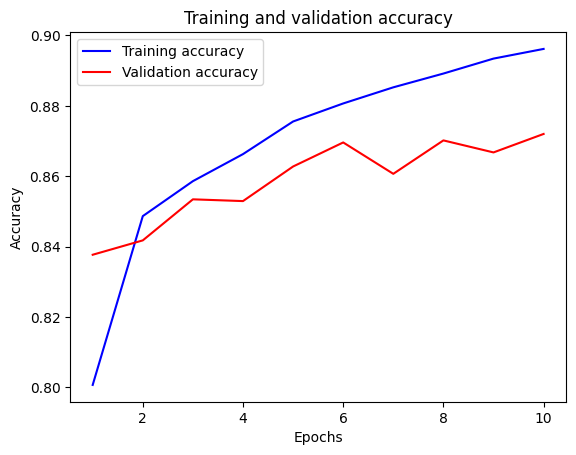

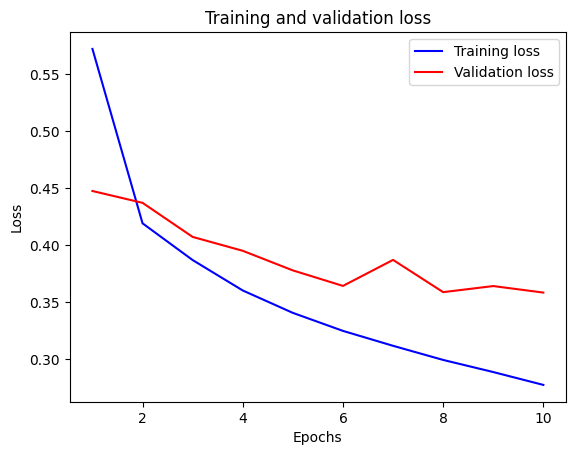

In [18]:
import matplotlib.pyplot as plt


accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()


plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# SUMMARY

- Initial Metrics (Epoch 1):

    - Model 1: accuracy: 0.8115 - val_loss: 0.4587 - val_accuracy: 0.8303
    - Model 2: accuracy: 0.8007 - val_loss: 0.4477 - val_accuracy: 0.8377

*Model 1 starts with higher accuracy and slightly higher loss on both the training and validation sets.*

- Improvement During Training:

    - Model 1 improves accuracy to 90.49% and reduces loss to 0.2533 on the training set and to 87.43% and 0.3521 on the validation set.
    - Model 2 improves accuracy to 89.62% and reduces loss to 0.2776 on the training set, and to 87.20% and 0.3586 on the validation set.

*Both models show significant improvement, but Model 1 has slightly better validation accuracy and lower losses.*


- Test Results:

    - Model 1: Test Accuracy: 0.8720, Test Loss: 0.3685
    - Model 2: Test Accuracy: 0.8668, Test Loss: 0.3727

*Model 1 performs better on the test set with higher accuracy and lower loss.*

- Training Time:
    - Model 1 has fewer iterations per epoch, which reduces the overall training time.
    - Model 2 has more iterations per epoch, which takes more time per epoch.


- Conclusions:

    - Model 1 shows better results on the test data, with higher accuracy (87.20% vs. 86.68%) and lower losses (0.3685 vs. 0.3727).
    - Model 1 performs slightly better on both the training and test sets.
    - The overall training time for Model 2 is higher due to more iterations per epoch.
    - Both models show minor overfitting, but both generalize well on the test data.


*Both models are effective, but Model 1 has a slight advantage in accuracy and losses on the test data, making it slightly better for real-world use.*